# Data Processing Approach for Portfolio Project

## Project Title: Brain tumor detection model

## Student Name: Aristide Isingizwe

---

1. **Data Sources and Aggregation:**
   - List all sources of data for the project. **You must consider sources outside kaggle, google datasets** (insert links where necessary to online platforms,research papers etc)

   **Your answer for data sources goes here **
   
   - Determine if data aggregation from multiple sources is necessary for comprehensive analysis.

   **Your answer for data agggregation goes here **



### Data Aggregation

- Kaggle Dataset: [Brain Tumor MRI Dataset](https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset)
- Research Article 1: [Nature Article](https://www.nature.com/articles/s41698-024-00575-0)
- Research Article 2: [ScienceDirect Article](https://www.sciencedirect.com/science/article/abs/pii/S0010482523005280)

### Dataset structure:
- training/yes: Images of patients with tumors.
- training/no: Images of patients without tumors.
- validation/yes: Validation images with tumors.
- validation/no: Validation images without tumors.

data/
├── training/
│   ├── yes/ (Tumor images)
│   ├── no/ (No tumor images)
└── validation/
    ├── yes/ (Tumor images)
    ├── no/ (No tumor images)




2. **Data Format Transformation:**
   - Describe the current format of the data.
   - Outline the planned transformation to a unified format suitable for analysis and modeling.

   ***Current Format:***
   - Images: Grayscale, stored in .jpg format.
   - Labels: Derived from folder names (yes, no).

   ***Planned Transformation:***
   - Normalize pixel values to the range [0, 1].
   - One-hot encode labels: yes -> [1, 0] and no -> [0, 1].



In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1.0 / 255)  # Normalize pixel values
train_generator = datagen.flow_from_directory(
    "data/training",
    target_size=(64, 64),
    batch_size=32,
    color_mode="grayscale",
    class_mode="categorical",
)

validation_generator = datagen.flow_from_directory(
    "data/validation",
    target_size=(64, 64),
    batch_size=32,
    color_mode="grayscale",
    class_mode="categorical",
)

Found 217 images belonging to 2 classes.
Found 36 images belonging to 2 classes.


3. **Data Exploration:**
   - Enumerate the features included in the dataset.
   
   - Summarize findings from exploratory data analysis (EDA) including distributions, correlations, and outliers.
   
      ***Features:***
      - Image Data: Grayscale pixel intensities.
      - Labels: yes (tumor), no (no tumor).
      
      ***Exploratory Data Analysis (EDA):***
      - Visualize sample images for each class.
      - Analyze class distribution.

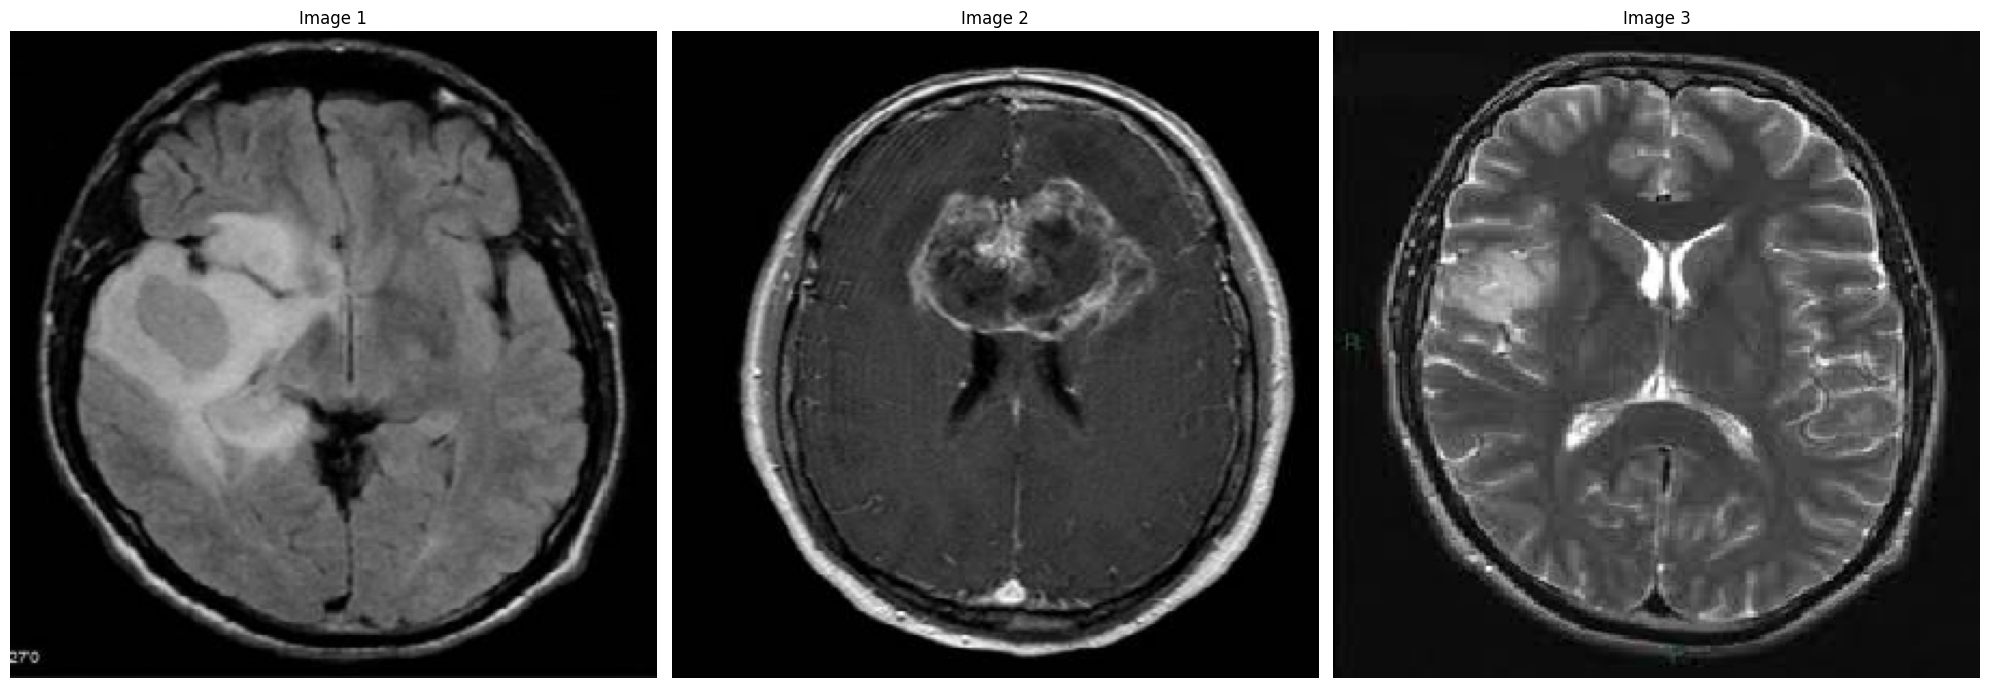

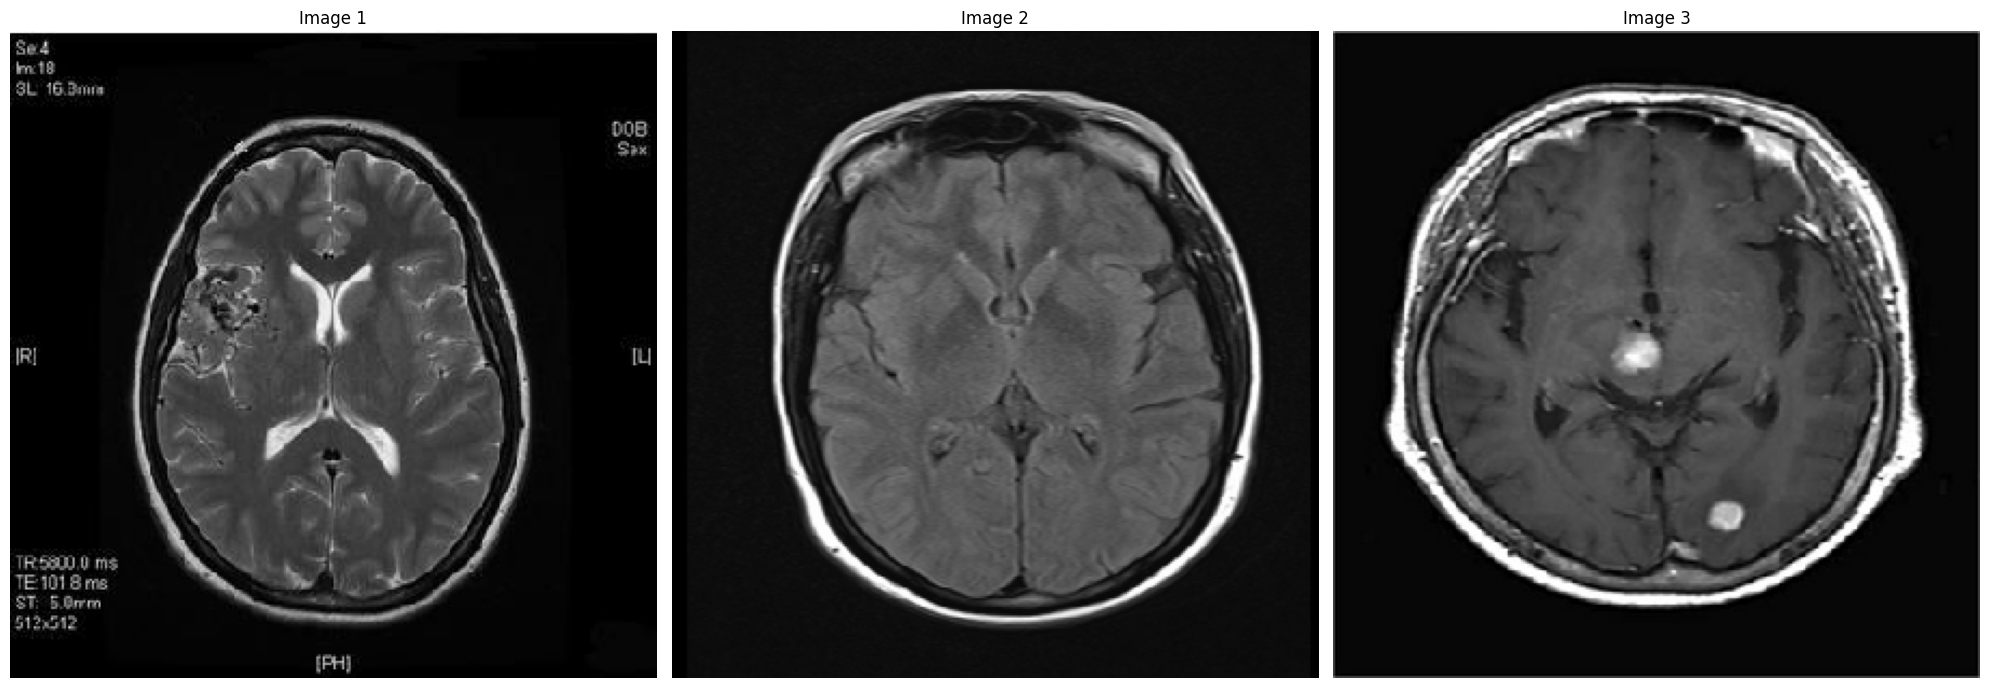

In [3]:
# Visualize sample images
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img
import random
import os


def plot_images_from_path(path, num_images=3):
    images = os.listdir(path)
    plt.figure(figsize=(20, 20))

    random_images = random.sample(images, min(num_images, len(images)))

    for i, img_name in enumerate(random_images):
        img_path = os.path.join(path, img_name)
        img = load_img(img_path, target_size=(300, 300))
        plt.subplot(1, num_images, i + 1)
        plt.imshow(img, cmap="gray")
        plt.title(f"Image {i+1}")
        plt.axis("off")

    plt.tight_layout()
    plt.show()


plot_images_from_path("data/training/yes")
plot_images_from_path("data/training/no")

### Class Distribution

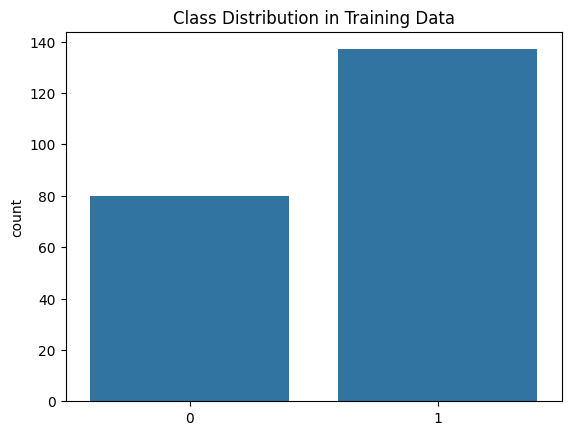

In [5]:
import seaborn as sns

sns.countplot(x=train_generator.classes)
plt.title("Class Distribution in Training Data")
plt.show()



4. **Hypothesis Testing:**
   - State any preexisting hypotheses about the data.
   - Explain methodologies to empirically test these hypotheses.

      ***Hypotheses:***
      - Tumor images have regions of higher pixel intensity compared to non-tumor images.
      - Data augmentation improves model generalization.

      ***Methodology:***
      - Compare the average intensity distributions between yes and no.
      - Train the model with and without augmentation to assess impact.

5. **Handling Sparse/Dense Data and Outliers:**
   - Assess the density of the data.
   - Propose strategies to handle missing data and outliers while maintaining dataset integrity.



In [8]:
# Detect corrupted images
from PIL import Image

for category in ["yes", "no"]:
    path = f"data/training/{category}"
    for file in os.listdir(path):
        try:
            img = Image.open(os.path.join(path, file))
            img.verify()
        except (IOError, SyntaxError):
            os.remove(os.path.join(path, file))

#### Outliers:
None expected due to the curated nature of the dataset.

6. **Data Splitting:**
   - Define a methodology to split the dataset into training, validation, and testing sets.
   - Ensure randomness and representativeness in each subset.

   -Dataset is Already split into training and validation. Ensure balanced classes in each subset.

7. **Bias Mitigation:**
   - Implement techniques to identify and mitigate biases in the dataset.
   - Ensure fairness and equity in data representation.
   


#### Class weights

In [9]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

class_weights = compute_class_weight(
    "balanced", classes=np.unique(train_generator.classes), y=train_generator.classes
)
class_weights_dict = dict(enumerate(class_weights))

#### Augmentation

In [10]:
datagen_augmented = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)

8. **Features for Model Training:**
   - Identify relevant features for training the model.
   - Rank features based on their significance to project objectives.

          - Features: Pixel intensity values (grayscale).
          - Labels: One-hot encoded.

In [11]:
# Visualize average images
avg_yes = train_generator[train_generator.classes == 0].mean(axis=0)
avg_no = train_generator[train_generator.classes == 1].mean(axis=0)

plt.imshow(avg_yes.squeeze(), cmap="gray")
plt.title("Average Tumor Image")
plt.show()

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [ ]:
#print out relevant features

9. **Types of Data Handling:**
   - Classify the types of data (categorical, numerical, etc.) present in the dataset.
   - Plan preprocessing steps for each data type.

         - Grayscale Images: Rescaled to [0, 1].
         - Labels: One-hot encoded.


10. **Data Transformation for Modeling:**
    - Specify methods for transforming raw data into a model-friendly format.
    - Detail steps for normalization, scaling, or encoding categorical variables.


### Purpose of ImageDataGenerator in Data Transformation

- Normalization:
          - Converts pixel values from the range [0, 255] to [0, 1] for numerical stability during model training. Neural networks converge faster with normalized inputs.

- Data Augmentation:

          - Generates additional training samples by applying random transformations like rotation, zoom, or flipping. This step improves the generalization of the model, especially when the dataset size is small.

- Batch Processing:

          - Converts image data into batches, which are efficiently processed during model training.


11. **Data Storage:**
    - Determine where and how processed data will be stored.
    - Choose suitable storage solutions ensuring accessibility and security.



##### Storage Format: Save processed data as .npy files for reuse.

In [ ]:
np.save("X_train.npy", X_train)
np.save("y_train.npy", y_train)

---

#### Notes:
- This template provides a structured framework for documenting your data processing approach for the portfolio project.
- Fill out each section with specific details relevant to your project's requirements and objectives.
- Use additional cells as needed to provide comprehensive information.